# Week 1 Homework

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

# Descriptive analysis and null values

In the cell below you can see the dataframe and it's columns to get an initial understanding of what the columns look like. Here we can see our 4 features and our prediction target column which is classes.

In [3]:
df

,variance,skew,curtsies,entropy,classes
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In this next cell we see a more detailed breakdown of the data such as how many rows for each feature, the standard deviation, and the min and max values for each feature.

In [12]:
df.describe()

,variance,skew,curtsies,entropy,classes
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In the cell below we also look into the column 'classes' to see how many occurances there are of 0's and 1's.

In [5]:
df['classes'].value_counts()

0    762
1    610
Name: classes, dtype: int64

Finally, the cell below checks to see if the data idetifies any null values within our dataframe.

In [4]:
df.isnull().values.any()

False

# Visualizing the data

In the graphic below we visulize the data with a pair plot so we can see the relationship each feature has with the others as well as their effect on the target column 'classes'.

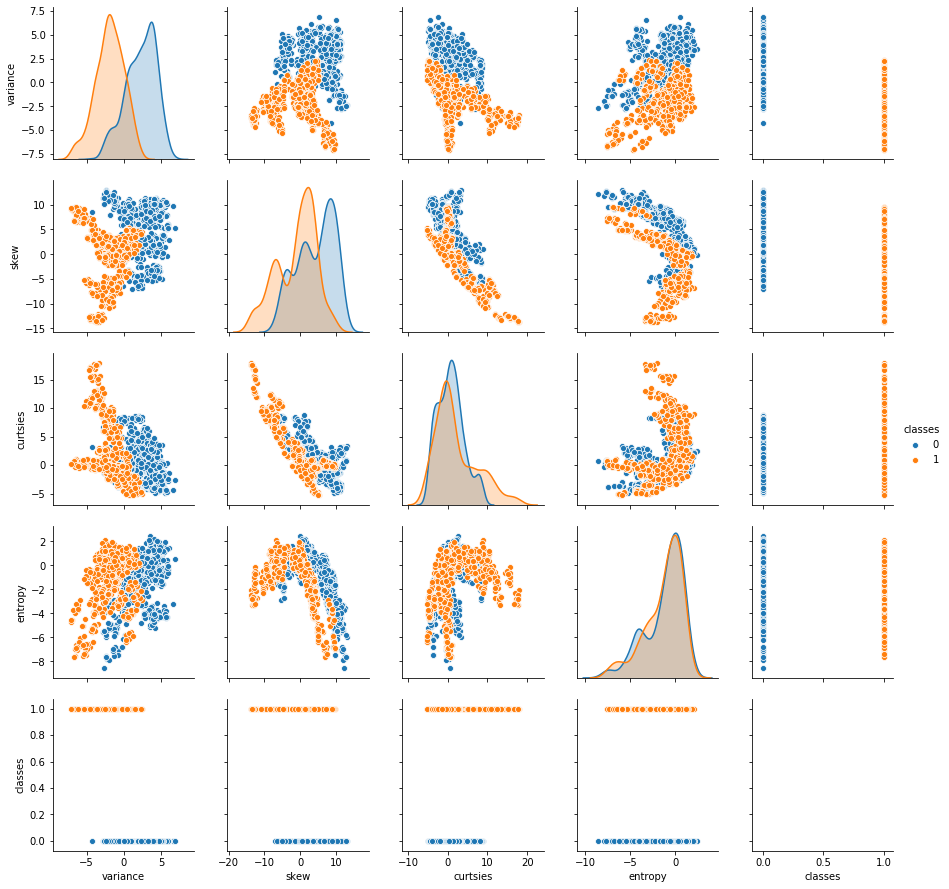

In [22]:
graph = sns.pairplot(df, hue='classes', markers='o')
plt.show()

# Training the model and testing its accuracy

In the cell below I ahev created two variables. The x variable contains all of the data except for the target column 'classes'. In the y variable I am saving just the target column 'classes'.

In [24]:
x = df.drop(['classes'], axis=1)
y = df['classes']

In the cell below I am now creating a train test split where I take a certain amount of the data, train our model on it, and then validate it on a held out portion of the data called the test dataset. From my predictive anlaytics courses I learned that we split the data into a 80-20 or 75-25 ratio between the train and test datset respectively. I have decided to use the 75-25 train test split.

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y)

In the cell below I imported the linear model perceptron and fit it onto the training dataset.

In [41]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In these last two cells I save the perceptron's preditions of x_test into a variable called y_pred in order to see how well my models predictions will work with the held out dataset. Then I find the accuracy score of the model based on the test dataset using the y_test and y_pred variables I created. We can see that this is a very accurate model because our accuracy score is extremely close to 1.

In [39]:
y_pred = ppn.predict(x_test)

In [40]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9941690962099126